In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Step 2: Load the features and target
X = pd.read_csv('X_with_cluster_pca.csv')
Y = pd.read_csv('Y.csv')

# Step 3: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

X_train.to_csv('X_train_pca.csv', index=False)
X_test.to_csv('X_test_pca.csv', index=False)

# Targets
y_train.to_csv('y_train_pca.csv', index=False)
y_test.to_csv('y_test_pca.csv', index=False)

# Confirm the shapes
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training features shape: (8171, 9)
Testing features shape: (2043, 9)
Training labels shape: (8171, 1)
Testing labels shape: (2043, 1)


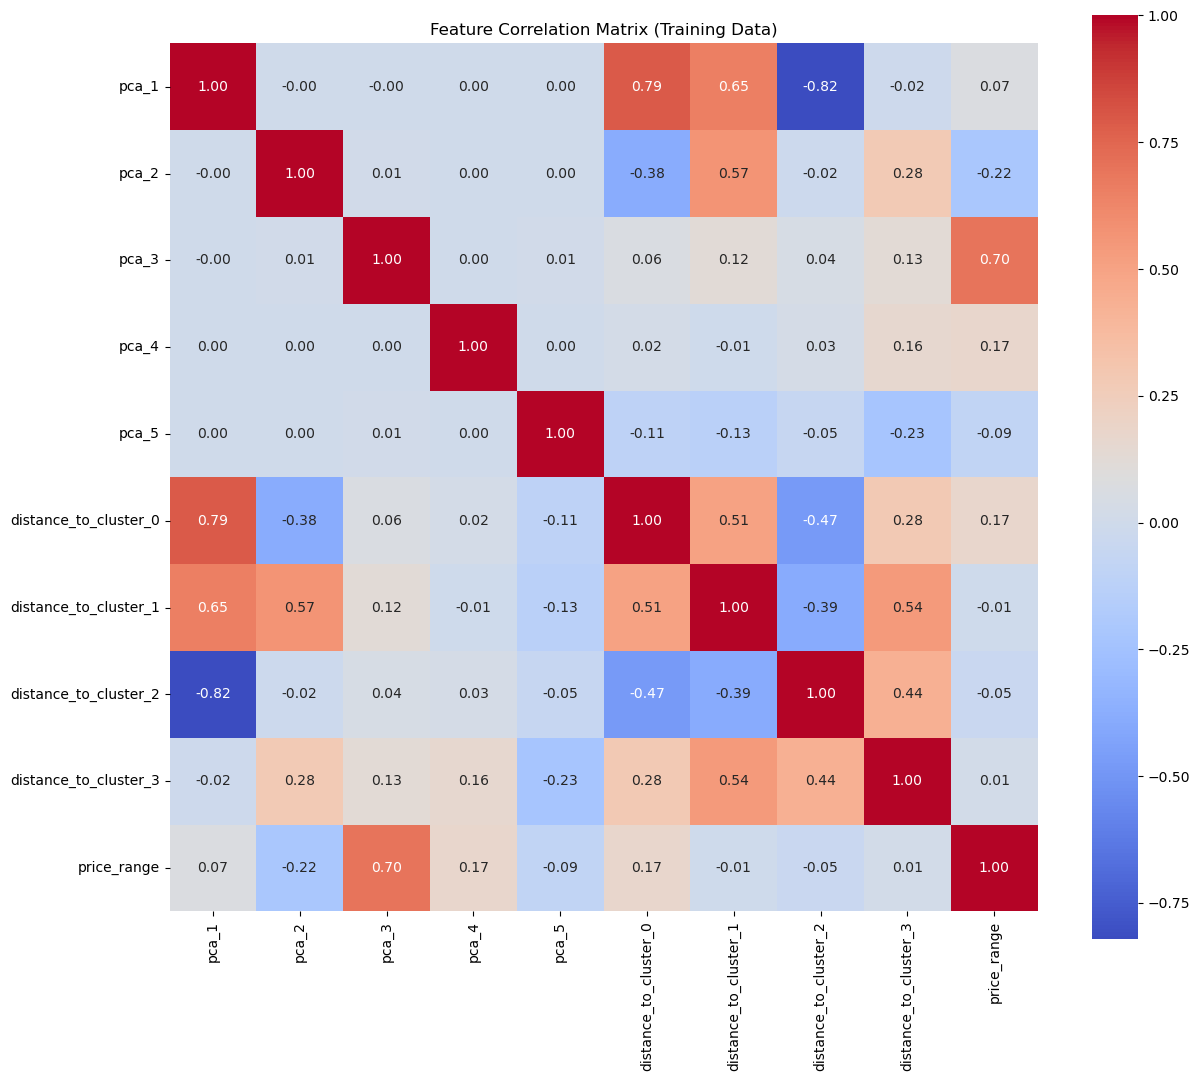

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

train_data = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
# Combine X_train and y_train to compute correlations
train_corr = train_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(14,12))
sns.heatmap(train_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Feature Correlation Matrix (Training Data)')
plt.show()

In [3]:
X_train = X_train.drop(columns=['pca_1'])
X_test = X_test.drop(columns=['pca_1'])

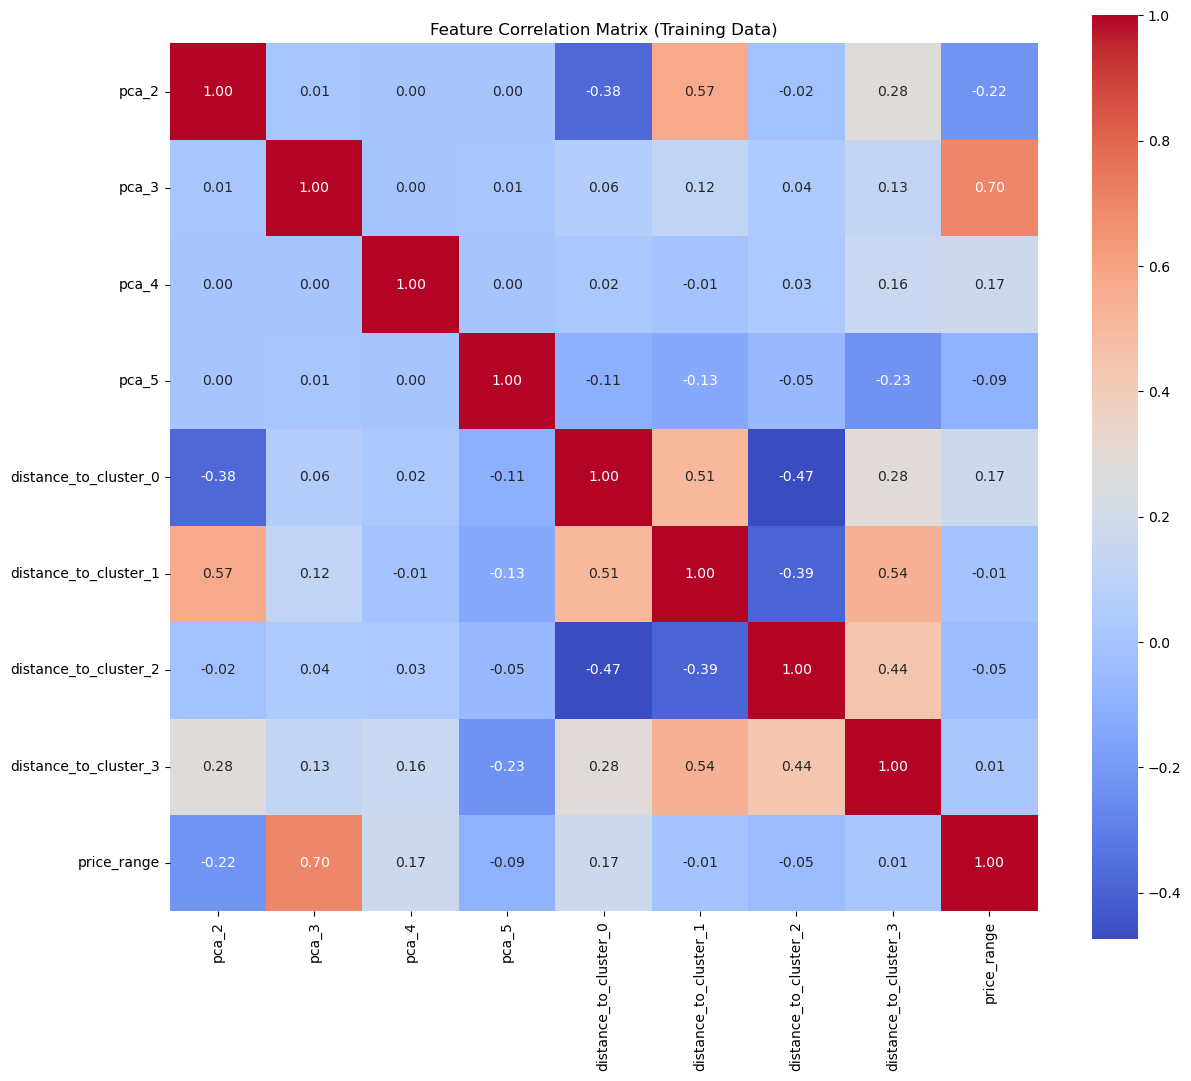

In [4]:
train_data = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
# Combine X_train and y_train to compute correlations
train_corr = train_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(14,12))
sns.heatmap(train_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Feature Correlation Matrix (Training Data)')
plt.show()

In [6]:
# Global Setup Cell
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Load your scaled and split data
# Load the training and test sets
y_train = pd.read_csv('y_train_pca.csv')
y_test = pd.read_csv('y_test_pca.csv')
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_small, _, y_train_small, _ = train_test_split(
    X_train_scaled, y_train, train_size=0.3, stratify=y_train, random_state=42
)

# Results storage
final_results = []


=== Linear SVM (No Transform) ===


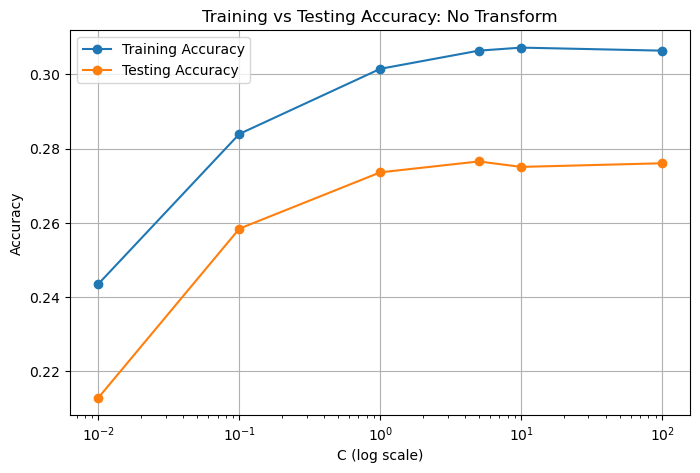


Precision and Recall Table (No Transform):


,C,Precision,Recall
0,0.01,0.150540,0.212922
1,0.10,0.191484,0.258443
2,1.00,0.237211,0.273617
3,5.00,0.235303,0.276554
4,10.00,0.233780,0.275086
5,100.00,0.236295,0.276065


In [8]:
# No Transform (Linear SVM)
train_acc_list = []
test_acc_list = []
precision_list = []
recall_list = []
C_values = [0.01, 0.1, 1, 5, 10, 100]
print("\n=== Linear SVM (No Transform) ===")

for C in C_values:
    model = SVC(C=C, kernel='linear', random_state=42)
    model.fit(X_train_small, y_train_small)

    y_train_pred = model.predict(X_train_small)
    y_test_pred = model.predict(X_test_scaled)

    train_acc = accuracy_score(y_train_small, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)

    final_results.append({
        'Transformation': 'No Transform',
        'C': C,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Precision': precision,
        'Recall': recall
    })

    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    precision_list.append(precision)
    recall_list.append(recall)

# Plot Training vs Testing Accuracy
plt.figure(figsize=(8,5))
plt.plot(C_values, train_acc_list, marker='o', label='Training Accuracy')
plt.plot(C_values, test_acc_list, marker='o', label='Testing Accuracy')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy: No Transform')
plt.legend()
plt.grid(True)
plt.show()

# Output Precision and Recall Table
prec_recall_table = pd.DataFrame({
    'C': C_values,
    'Precision': precision_list,
    'Recall': recall_list
})
print("\nPrecision and Recall Table (No Transform):")
display(prec_recall_table)


=== Polynomial Features Degree 2 ===


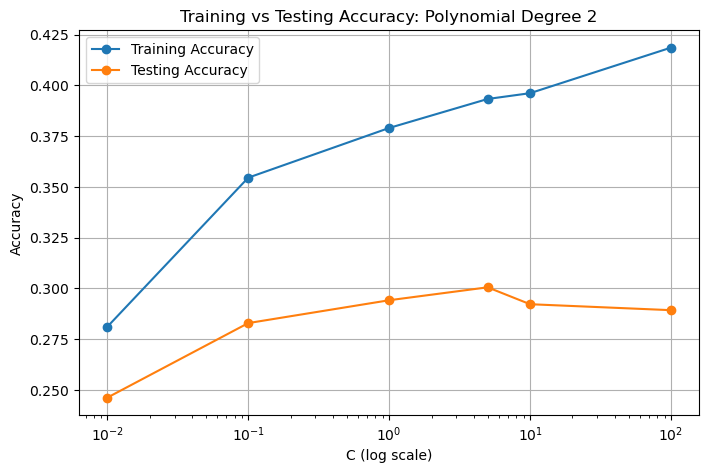


Precision and Recall Table (Polynomial Degree 2):


,C,Precision,Recall
0,0.01,0.196179,0.246207
1,0.10,0.258202,0.282917
2,1.00,0.273959,0.294175
3,5.00,0.285571,0.300538
4,10.00,0.276402,0.292217
5,100.00,0.275917,0.289280


In [9]:
poly2 = PolynomialFeatures(degree=2)
X_train_poly2 = poly2.fit_transform(X_train_small)
X_test_poly2 = poly2.transform(X_test_scaled)

train_acc_list = []
test_acc_list = []
precision_list = []
recall_list = []

print("\n=== Polynomial Features Degree 2 ===")

for C in C_values:
    model = SVC(C=C, kernel='linear', random_state=42)
    model.fit(X_train_poly2, y_train_small)

    y_train_pred = model.predict(X_train_poly2)
    y_test_pred = model.predict(X_test_poly2)

    train_acc = accuracy_score(y_train_small, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)

    final_results.append({
        'Transformation': 'Poly Degree 2',
        'C': C,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Precision': precision,
        'Recall': recall
    })

    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    precision_list.append(precision)
    recall_list.append(recall)

# Plot
plt.figure(figsize=(8,5))
plt.plot(C_values, train_acc_list, marker='o', label='Training Accuracy')
plt.plot(C_values, test_acc_list, marker='o', label='Testing Accuracy')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy: Polynomial Degree 2')
plt.legend()
plt.grid(True)
plt.show()

# Table
prec_recall_table = pd.DataFrame({'C': C_values, 'Precision': precision_list, 'Recall': recall_list})
print("\nPrecision and Recall Table (Polynomial Degree 2):")
display(prec_recall_table)

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Step 2: Load the features and target
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

X_train = X_train.drop(columns=['population'])
X_train = X_train.drop(columns=['total_rooms'])
X_train = X_train.drop(columns=['total_bedrooms'])
X_train = X_train.drop(columns=['latitude'])

X_test = X_test.drop(columns=['population'])
X_test = X_test.drop(columns=['total_rooms'])
X_test = X_test.drop(columns=['total_bedrooms'])
X_test = X_test.drop(columns=['latitude'])

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_small, _, y_train_small, _ = train_test_split(
    X_train_scaled, y_train, train_size=0.3, stratify=y_train, random_state=42
)

# Results storage
final_results = []


=== Linear SVM (No Transform) ===


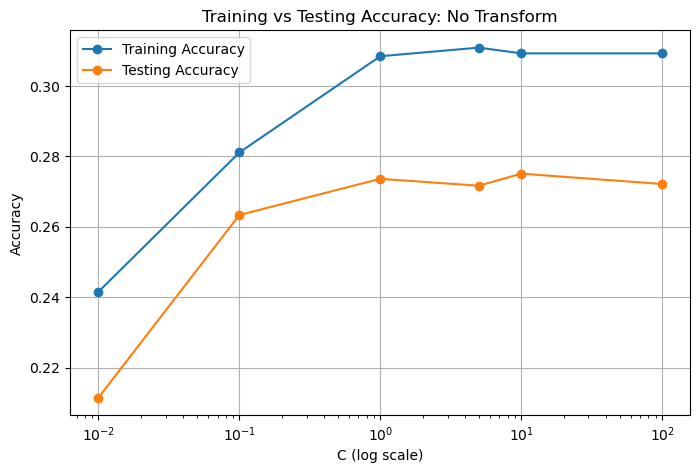


Precision and Recall Table (No Transform):


,C,Precision,Recall
0,0.01,0.145219,0.211454
1,0.10,0.198673,0.263338
2,1.00,0.248281,0.273617
3,5.00,0.286572,0.271659
4,10.00,0.254688,0.275086
5,100.00,0.285573,0.272149


In [10]:
# No Transform (Linear SVM)
train_acc_list = []
test_acc_list = []
precision_list = []
recall_list = []

C_values = [0.01, 0.1, 1, 5, 10, 100]

print("\n=== Linear SVM (No Transform) ===")

for C in C_values:
    model = SVC(C=C, kernel='linear', random_state=42)
    model.fit(X_train_small, y_train_small)

    y_train_pred = model.predict(X_train_small)
    y_test_pred = model.predict(X_test_scaled)

    train_acc = accuracy_score(y_train_small, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)

    final_results.append({
        'Transformation': 'No Transform',
        'C': C,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Precision': precision,
        'Recall': recall
    })

    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    precision_list.append(precision)
    recall_list.append(recall)

# Plot Training vs Testing Accuracy
plt.figure(figsize=(8,5))
plt.plot(C_values, train_acc_list, marker='o', label='Training Accuracy')
plt.plot(C_values, test_acc_list, marker='o', label='Testing Accuracy')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy: No Transform')
plt.legend()
plt.grid(True)
plt.show()

# Output Precision and Recall Table
prec_recall_table = pd.DataFrame({
    'C': C_values,
    'Precision': precision_list,
    'Recall': recall_list
})
print("\nPrecision and Recall Table (No Transform):")
display(prec_recall_table)


=== Polynomial Features Degree 2 ===


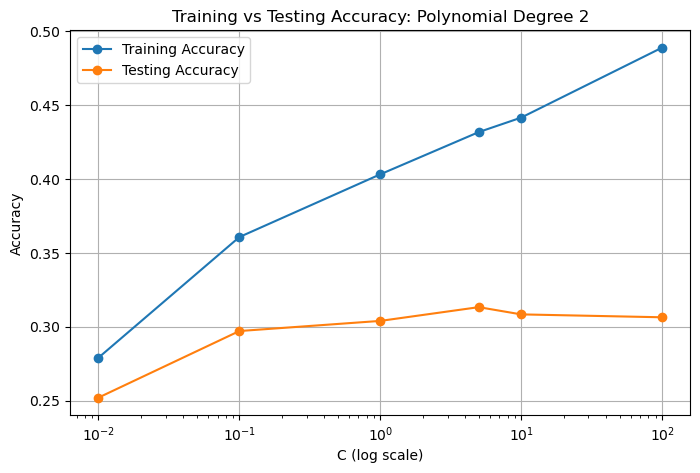


Precision and Recall Table (Polynomial Degree 2):


,C,Precision,Recall
0,0.01,0.210963,0.252080
1,0.10,0.270796,0.297112
2,1.00,0.283486,0.303965
3,5.00,0.301543,0.313265
4,10.00,0.296354,0.308370
5,100.00,0.293024,0.306412


In [11]:
# Polynomial Features (Degree 2)
poly2 = PolynomialFeatures(degree=2)
X_train_poly2 = poly2.fit_transform(X_train_small)
X_test_poly2 = poly2.transform(X_test_scaled)

train_acc_list = []
test_acc_list = []
precision_list = []
recall_list = []

print("\n=== Polynomial Features Degree 2 ===")

for C in C_values:
    model = SVC(C=C, kernel='linear', random_state=42)
    model.fit(X_train_poly2, y_train_small)

    y_train_pred = model.predict(X_train_poly2)
    y_test_pred = model.predict(X_test_poly2)

    train_acc = accuracy_score(y_train_small, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)

    final_results.append({
        'Transformation': 'Poly Degree 2',
        'C': C,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Precision': precision,
        'Recall': recall
    })

    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    precision_list.append(precision)
    recall_list.append(recall)

# Plot
plt.figure(figsize=(8,5))
plt.plot(C_values, train_acc_list, marker='o', label='Training Accuracy')
plt.plot(C_values, test_acc_list, marker='o', label='Testing Accuracy')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy: Polynomial Degree 2')
plt.legend()
plt.grid(True)
plt.show()

# Table
prec_recall_table = pd.DataFrame({'C': C_values, 'Precision': precision_list, 'Recall': recall_list})
print("\nPrecision and Recall Table (Polynomial Degree 2):")
display(prec_recall_table)


=== RBF Kernel ===


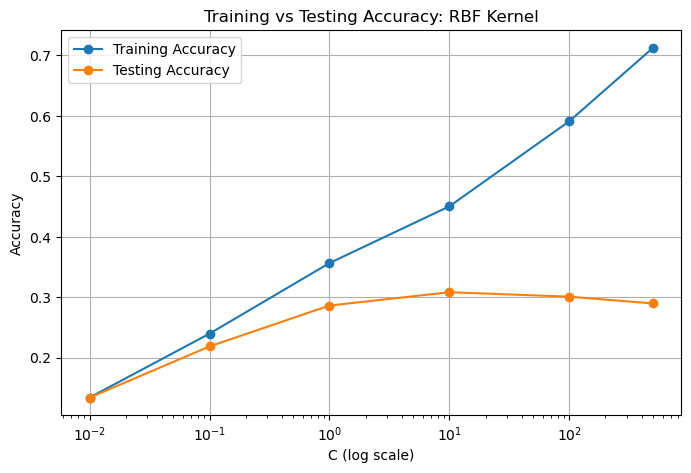


Precision and Recall Table (RBF Kernel):


,C,Precision,Recall
0,0.01,0.017987,0.134116
1,0.10,0.128484,0.218796
2,1.00,0.227049,0.286344
3,10.00,0.285764,0.308370
4,100.00,0.291482,0.301028
5,500.00,0.281189,0.289770


In [12]:
# RBF Kernel
train_acc_list = []
test_acc_list = []
precision_list = []
recall_list = []
C_values = [0.01, 0.1, 1, 10, 100, 500]
print("\n=== RBF Kernel ===")

for C in C_values:
    model = SVC(C=C, kernel='rbf', gamma='scale', random_state=42)
    model.fit(X_train_small, y_train_small)

    y_train_pred = model.predict(X_train_small)
    y_test_pred = model.predict(X_test_scaled)

    train_acc = accuracy_score(y_train_small, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)

    final_results.append({
        'Transformation': 'RBF Kernel',
        'C': C,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Precision': precision,
        'Recall': recall
    })

    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    precision_list.append(precision)
    recall_list.append(recall)

# Plot
plt.figure(figsize=(8,5))
plt.plot(C_values, train_acc_list, marker='o', label='Training Accuracy')
plt.plot(C_values, test_acc_list, marker='o', label='Testing Accuracy')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy: RBF Kernel')
plt.legend()
plt.grid(True)
plt.show()

# Table
prec_recall_table = pd.DataFrame({'C': C_values, 'Precision': precision_list, 'Recall': recall_list})
print("\nPrecision and Recall Table (RBF Kernel):")
display(prec_recall_table)